In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import xgboost as xgb
# Load the dataset
data_path = r'C:\Users\user name\Documents\world disaster center\social media iran\updated_iran_protests_dataset_with_favourites6.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataset
print(data.head())


        Date  Death Toll of Protestors  Number of Children Killed  \
0  9/17/2022                         0                          0   
1  9/18/2022                         0                          0   
2  9/19/2022                         8                          0   
3  9/20/2022                        28                          1   
4  9/21/2022                        74                          8   

   Number of Military-Security Personnel Killed  \
0                                             0   
1                                             0   
2                                             0   
3                                             1   
4                                             9   

   Number of Individuals Arrested  Number of Detainees Identified  \
0                              78                              13   
1                             255                              29   
2                             527                              58   
3 

In [47]:
# Ensure the 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter training data (from 9/17/2022 to 2/20/2023)
train_data = data[(data['Date'] >= '2022-09-17') & (data['Date'] <= '2023-02-20')]

# Filter future prediction data (from 1/30/2023 to 2/21/2023)
future_data = data[(data['Date'] >= '2023-01-30') & (data['Date'] <= '2023-02-21')]

# Select features and target variable
features = [
    'Number of Children Killed',
    'Number of Military-Security Personnel Killed',
    'Number of Individuals Arrested',
    'Number of Detainees Identified',
    'Number of Students Arrested',
    'Number of Protests',
    'Number of Cities Involved',
    'Number of Universities Involved',
    'Nearest_Hashtag',
    'Aggregated_Hashtag_Favourites',
    'Total_Followers'
]
target = 'Death Toll of Protestors'

# Prepare X and y for training
X_train = train_data[features]
y_train = train_data[target]


In [50]:
# Prepare X and y for training
X_train = train_data[features]
y_train = train_data[target]

# Handle missing values
X_train.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)

# Preprocessing
# Identify categorical and numerical columns
categorical_cols = ['Nearest_Hashtag']
numerical_cols = list(set(features) - set(categorical_cols))

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Create a Random Forest Regressor model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


C:\Users\user name\AppData\Local\Temp\ipykernel_15212\2795117597.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(0, inplace=True)
C:\Users\user name\AppData\Local\Temp\ipykernel_15212\2795117597.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train.fillna(0, inplace=True)


In [51]:
# Train the model
model.fit(X_train, y_train)

# Prepare future data for predictions
X_future = future_data[features]
X_future.fillna(0, inplace=True)  # Handle missing values

# Make predictions for the future dates
future_predictions = model.predict(X_future)

# Output future predictions
future_data['Predicted_Death_Toll'] = future_predictions
print(future_data[['Date', 'Predicted_Death_Toll']])

# Split the original training data for testing (optional, for evaluation)
X_train_full, X_test, y_train_full, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Evaluate the model on test data (optional)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nMean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

          Date  Predicted_Death_Toll
135 2023-01-30                527.00
136 2023-01-31                527.00
137 2023-02-01                527.01
138 2023-02-02                527.02
139 2023-02-03                527.06
140 2023-02-04                527.08
141 2023-02-05                527.28
142 2023-02-06                527.64
143 2023-02-07                527.85
144 2023-02-08                527.97
145 2023-02-09                528.01
146 2023-02-10                528.12
147 2023-02-11                528.16
148 2023-02-12                528.92
149 2023-02-13                528.98
150 2023-02-14                528.96
151 2023-02-15                528.98
152 2023-02-16                529.02
153 2023-02-17                529.13
154 2023-02-18                529.21
155 2023-02-19                529.71
156 2023-02-20                529.72
157 2023-02-21                529.58

Mean Squared Error: 0.7170812499999958
R^2 Score: 0.999963218259991


C:\Users\user name\AppData\Local\Temp\ipykernel_15212\3188651166.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_future.fillna(0, inplace=True)  # Handle missing values
C:\Users\user name\AppData\Local\Temp\ipykernel_15212\3188651166.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_data['Predicted_Death_Toll'] = future_predictions


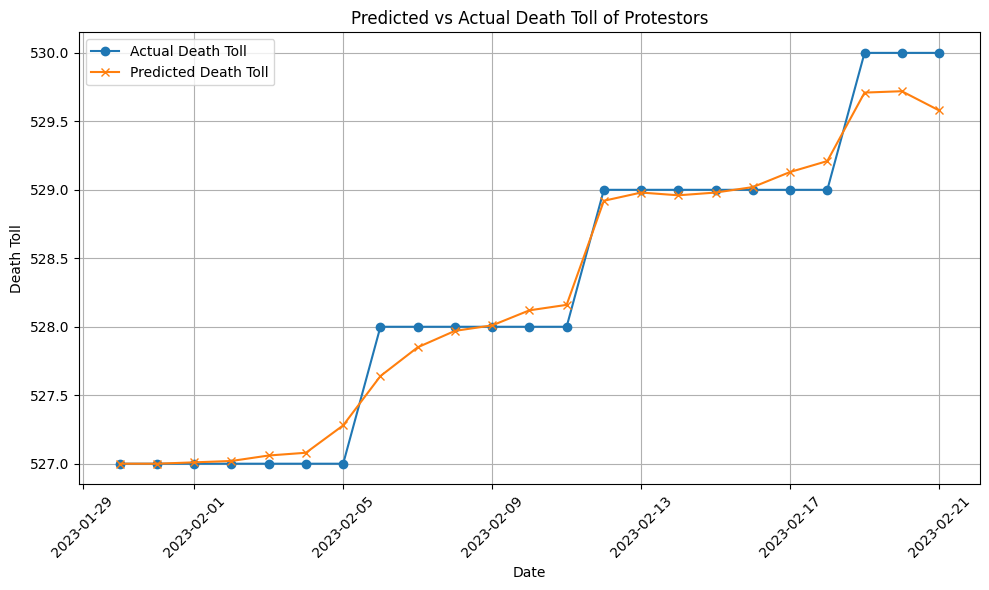

In [55]:
# Plotting Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.plot(future_data['Date'], future_data['Death Toll of Protestors'], label='Actual Death Toll', marker='o')
plt.plot(future_data['Date'], future_data['Predicted_Death_Toll'], label='Predicted Death Toll', marker='x')
plt.title('Predicted vs Actual Death Toll of Protestors')
plt.xlabel('Date')
plt.ylabel('Death Toll')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [63]:
# Create an XGBoost model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(n_estimators=100, random_state=42, learning_rate=0.1, max_depth=6))
])

# Train the model
model.fit(X_train, y_train)

# Prepare future data for predictions
X_future = future_data[features]
X_future.fillna(0, inplace=True)  # Handle missing values

# Make predictions for the future dates
future_predictions = model.predict(X_future)

# Output future predictions
future_data['Predicted_Death_Toll'] = future_predictions
print(future_data[['Date', 'Predicted_Death_Toll']])


C:\Users\user name\AppData\Local\Temp\ipykernel_15212\1110068878.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_future.fillna(0, inplace=True)  # Handle missing values


          Date  Predicted_Death_Toll
135 2023-01-30            526.988525
136 2023-01-31            526.988525
137 2023-02-01            526.988525
138 2023-02-02            526.988525
139 2023-02-03            526.991272
140 2023-02-04            526.988525
141 2023-02-05            526.988525
142 2023-02-06            527.986633
143 2023-02-07            527.984497
144 2023-02-08            527.984497
145 2023-02-09            527.984497
146 2023-02-10            527.984497
147 2023-02-11            527.984497
148 2023-02-12            528.982300
149 2023-02-13            528.977783
150 2023-02-14            528.976135
151 2023-02-15            528.976135
152 2023-02-16            528.976135
153 2023-02-17            528.976135
154 2023-02-18            528.976135
155 2023-02-19            529.903503
156 2023-02-20            529.927612
157 2023-02-21            529.903503


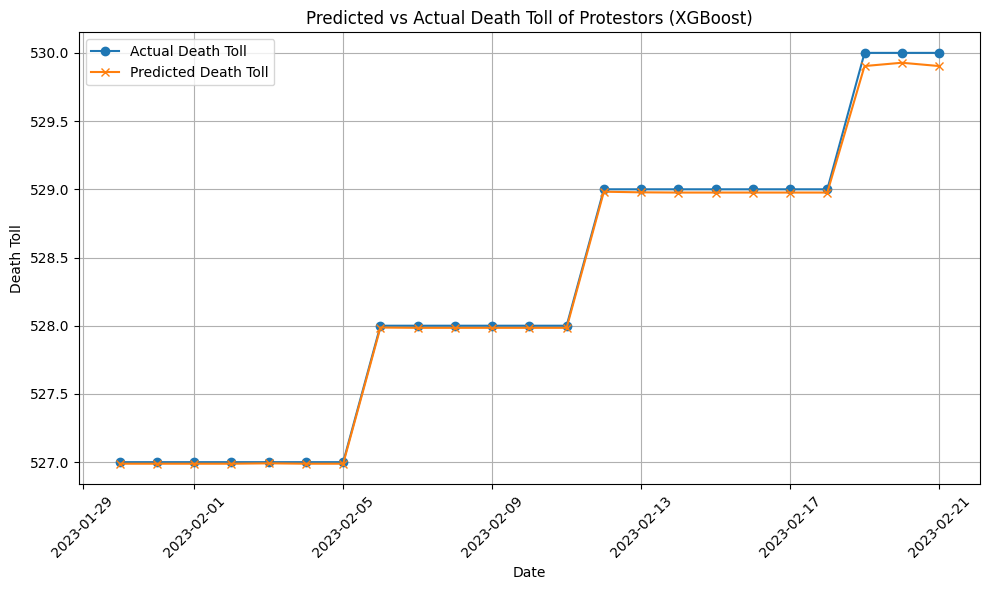


Mean Squared Error: 0.002219565230916487
R^2 Score: 0.9999998807907104


In [64]:
# Plotting Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.plot(future_data['Date'], future_data['Death Toll of Protestors'], label='Actual Death Toll', marker='o')
plt.plot(future_data['Date'], future_data['Predicted_Death_Toll'], label='Predicted Death Toll', marker='x')
plt.title('Predicted vs Actual Death Toll of Protestors (XGBoost)')
plt.xlabel('Date')
plt.ylabel('Death Toll')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Evaluate the model on test data (optional)
X_train_full, X_test, y_train_full, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nMean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

C:\Users\user name\AppData\Local\Temp\ipykernel_15212\3024114680.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_future.fillna(0, inplace=True)  # Handle missing values


          Date  Predicted_Death_Toll
135 2023-01-30            526.980336
136 2023-01-31            526.980336
137 2023-02-01            526.980336
138 2023-02-02            526.983422
139 2023-02-03            526.988744
140 2023-02-04            526.980336
141 2023-02-05            526.980336
142 2023-02-06            527.962664
143 2023-02-07            527.962664
144 2023-02-08            527.962664
145 2023-02-09            527.965750
146 2023-02-10            527.962664
147 2023-02-11            527.962664
148 2023-02-12            528.939631
149 2023-02-13            528.934309
150 2023-02-14            528.931222
151 2023-02-15            528.931222
152 2023-02-16            528.931222
153 2023-02-17            528.931222
154 2023-02-18            528.931222
155 2023-02-19            529.817798
156 2023-02-20            529.824608
157 2023-02-21            529.825449


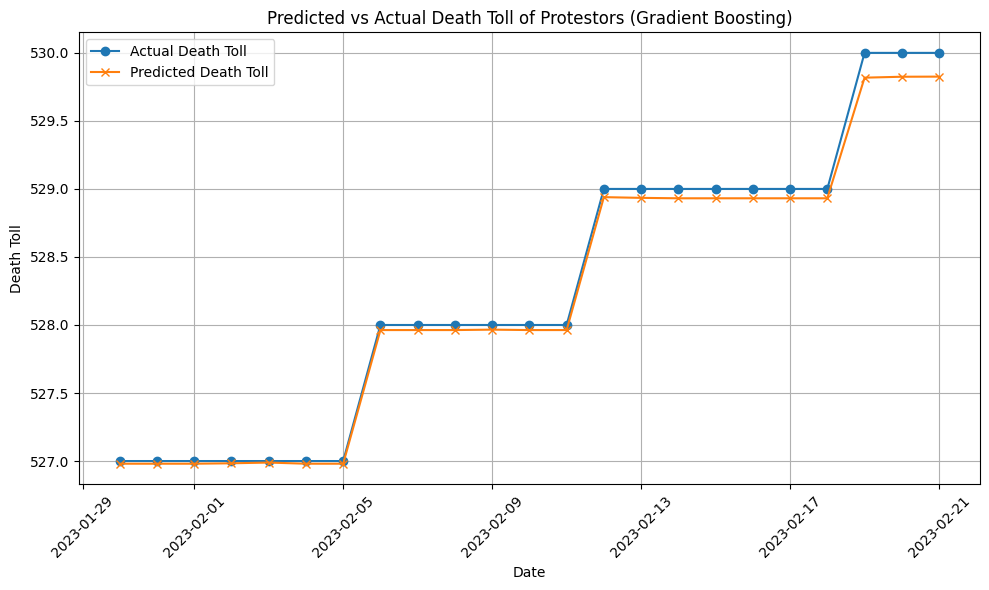


Mean Squared Error: 0.01545180963986181
R^2 Score: 0.9999992027900556


In [66]:
# Imports
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Prepare future data for predictions
X_future = future_data[features]
X_future.fillna(0, inplace=True)  # Handle missing values

# Make predictions for the future dates
future_predictions = model.predict(X_future)

# Output future predictions
future_data['Predicted_Death_Toll'] = future_predictions
print(future_data[['Date', 'Predicted_Death_Toll']])

# Plotting Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.plot(future_data['Date'], future_data['Death Toll of Protestors'], label='Actual Death Toll', marker='o')
plt.plot(future_data['Date'], future_data['Predicted_Death_Toll'], label='Predicted Death Toll', marker='x')
plt.title('Predicted vs Actual Death Toll of Protestors (Gradient Boosting)')
plt.xlabel('Date')
plt.ylabel('Death Toll')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Evaluate the model on test data
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nMean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000826 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 157, number of used features: 10
[LightGBM] [Info] Start training from score 395.503185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

C:\Users\user name\AppData\Local\Temp\ipykernel_15212\1405631410.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_future.fillna(0, inplace=True)


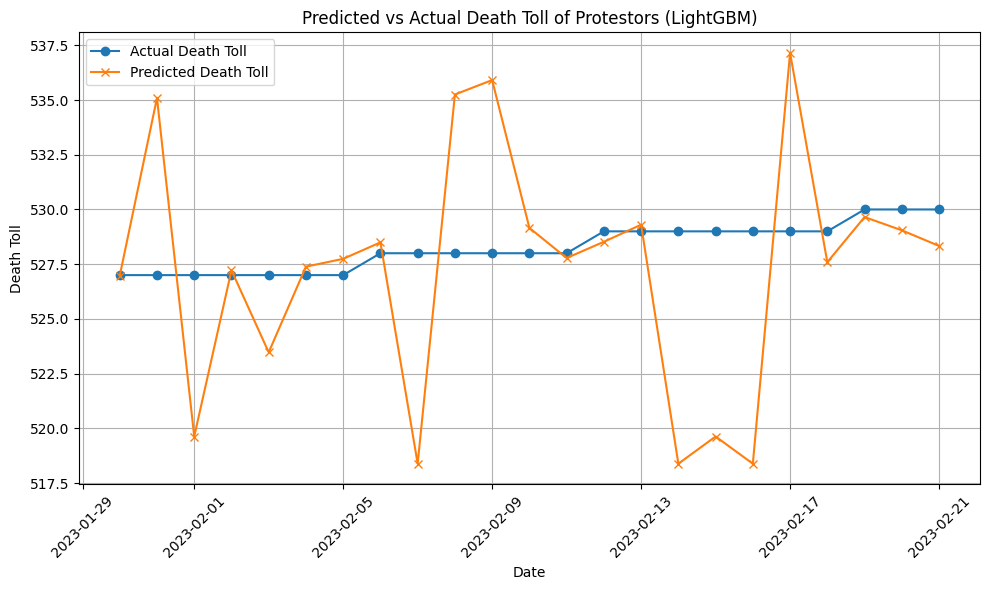


Mean Squared Error: 347.05890977898605
R^2 Score: 0.9820940834361664


In [67]:
# Imports
import lightgbm as lgb

# Create a LightGBM model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', lgb.LGBMRegressor(n_estimators=100, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Prepare future data for predictions
X_future = future_data[features]
X_future.fillna(0, inplace=True)

# Make predictions for the future dates
future_predictions = model.predict(X_future)

# Output future predictions
future_data['Predicted_Death_Toll'] = future_predictions
print(future_data[['Date', 'Predicted_Death_Toll']])

# Plotting Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.plot(future_data['Date'], future_data['Death Toll of Protestors'], label='Actual Death Toll', marker='o')
plt.plot(future_data['Date'], future_data['Predicted_Death_Toll'], label='Predicted Death Toll', marker='x')
plt.title('Predicted vs Actual Death Toll of Protestors (LightGBM)')
plt.xlabel('Date')
plt.ylabel('Death Toll')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Evaluate the model on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nMean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


C:\Users\user name\AppData\Local\Temp\ipykernel_15212\1436036994.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_future.fillna(0, inplace=True)


          Date  Predicted_Death_Toll
135 2023-01-30            488.875080
136 2023-01-31            488.115970
137 2023-02-01            488.694076
138 2023-02-02            489.304131
139 2023-02-03            477.028377
140 2023-02-04            489.055897
141 2023-02-05            488.582934
142 2023-02-06            487.326552
143 2023-02-07            486.757032
144 2023-02-08            489.003943
145 2023-02-09            488.464596
146 2023-02-10            489.027197
147 2023-02-11            489.090302
148 2023-02-12            482.684973
149 2023-02-13            488.799839
150 2023-02-14            487.620603
151 2023-02-15            488.670848
152 2023-02-16            487.020274
153 2023-02-17            488.598055
154 2023-02-18            489.193991
155 2023-02-19            488.963183
156 2023-02-20            482.119214
157 2023-02-21            490.100444


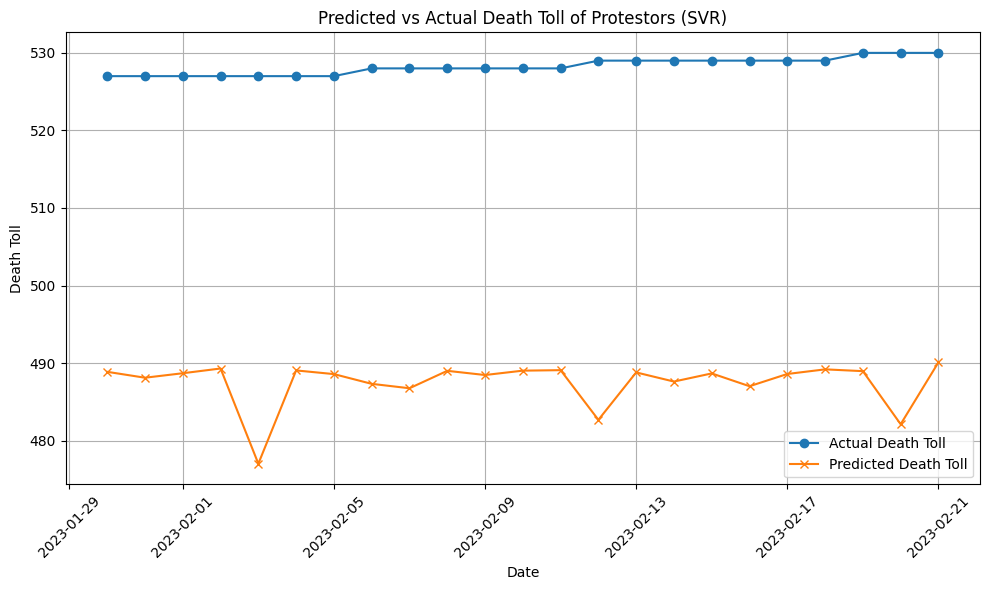


Mean Squared Error: 15999.562949876006
R^2 Score: 0.1745296514049386


In [68]:
# Imports
from sklearn.svm import SVR

# Create an SVR model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR())
])

# Train the model
model.fit(X_train, y_train)

# Prepare future data for predictions
X_future = future_data[features]
X_future.fillna(0, inplace=True)

# Make predictions for the future dates
future_predictions = model.predict(X_future)

# Output future predictions
future_data['Predicted_Death_Toll'] = future_predictions
print(future_data[['Date', 'Predicted_Death_Toll']])

# Plotting Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.plot(future_data['Date'], future_data['Death Toll of Protestors'], label='Actual Death Toll', marker='o')
plt.plot(future_data['Date'], future_data['Predicted_Death_Toll'], label='Predicted Death Toll', marker='x')
plt.title('Predicted vs Actual Death Toll of Protestors (SVR)')
plt.xlabel('Date')
plt.ylabel('Death Toll')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Evaluate the model on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nMean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


C:\Users\user name\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user name\AppData\Local\Temp\ipykernel_15212\638542542.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_future.fillna(0, inplace=True)


          Date  Predicted_Death_Toll
135 2023-01-30            522.609533
136 2023-01-31            549.111555
137 2023-02-01            546.233015
138 2023-02-02            532.180576
139 2023-02-03            441.211174
140 2023-02-04            537.281371
141 2023-02-05            521.938797
142 2023-02-06            504.575697
143 2023-02-07            561.194055
144 2023-02-08            541.884562
145 2023-02-09            562.473786
146 2023-02-10            542.748254
147 2023-02-11            533.160446
148 2023-02-12            485.437388
149 2023-02-13            529.068723
150 2023-02-14            561.403593
151 2023-02-15            558.139971
152 2023-02-16            563.746904
153 2023-02-17            555.248059
154 2023-02-18            543.964880
155 2023-02-19            544.306075
156 2023-02-20            497.825271
157 2023-02-21            466.084216


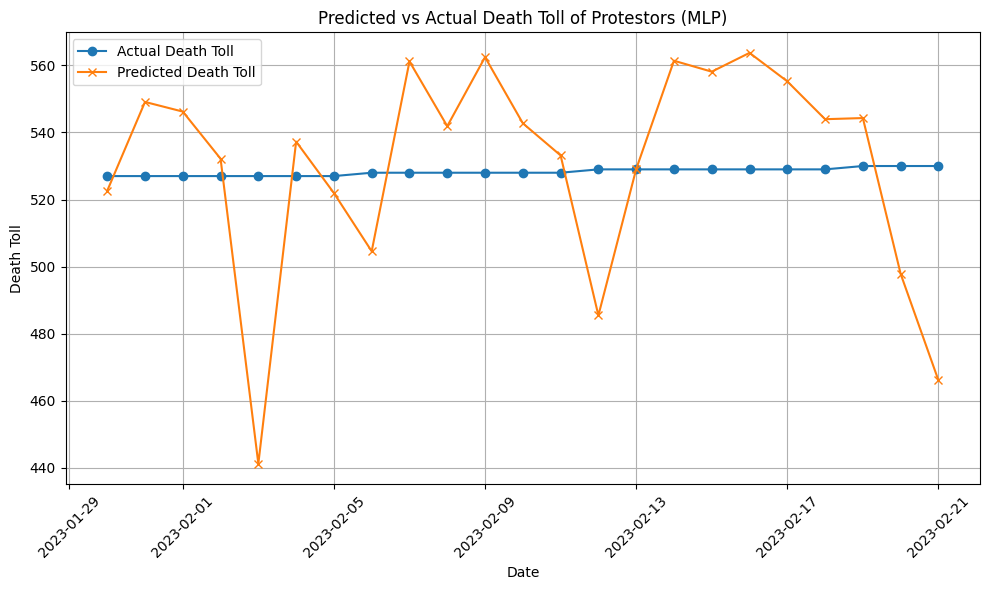


Mean Squared Error: 7666.990956478912
R^2 Score: 0.6044345887855094


In [69]:
# Imports
from sklearn.neural_network import MLPRegressor

# Create an MLP model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000))
])

# Train the model
model.fit(X_train, y_train)

# Prepare future data for predictions
X_future = future_data[features]
X_future.fillna(0, inplace=True)

# Make predictions for the future dates
future_predictions = model.predict(X_future)

# Output future predictions
future_data['Predicted_Death_Toll'] = future_predictions
print(future_data[['Date', 'Predicted_Death_Toll']])

# Plotting Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.plot(future_data['Date'], future_data['Death Toll of Protestors'], label='Actual Death Toll', marker='o')
plt.plot(future_data['Date'], future_data['Predicted_Death_Toll'], label='Predicted Death Toll', marker='x')
plt.title('Predicted vs Actual Death Toll of Protestors (MLP)')
plt.xlabel('Date')
plt.ylabel('Death Toll')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Evaluate the model on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nMean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


C:\Users\user name\AppData\Local\Temp\ipykernel_15212\1973152734.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_future.fillna(0, inplace=True)


          Date  Predicted_Death_Toll
135 2023-01-30            527.398555
136 2023-01-31            527.330175
137 2023-02-01            527.732005
138 2023-02-02            526.735619
139 2023-02-03            525.880360
140 2023-02-04            528.013526
141 2023-02-05            527.822211
142 2023-02-06            527.292895
143 2023-02-07            528.618305
144 2023-02-08            528.691280
145 2023-02-09            528.580511
146 2023-02-10            528.497384
147 2023-02-11            528.278688
148 2023-02-12            528.986514
149 2023-02-13            528.450989
150 2023-02-14            529.078599
151 2023-02-15            528.196357
152 2023-02-16            528.704472
153 2023-02-17            529.159591
154 2023-02-18            528.844425
155 2023-02-19            529.216407
156 2023-02-20            529.324670
157 2023-02-21            526.383822


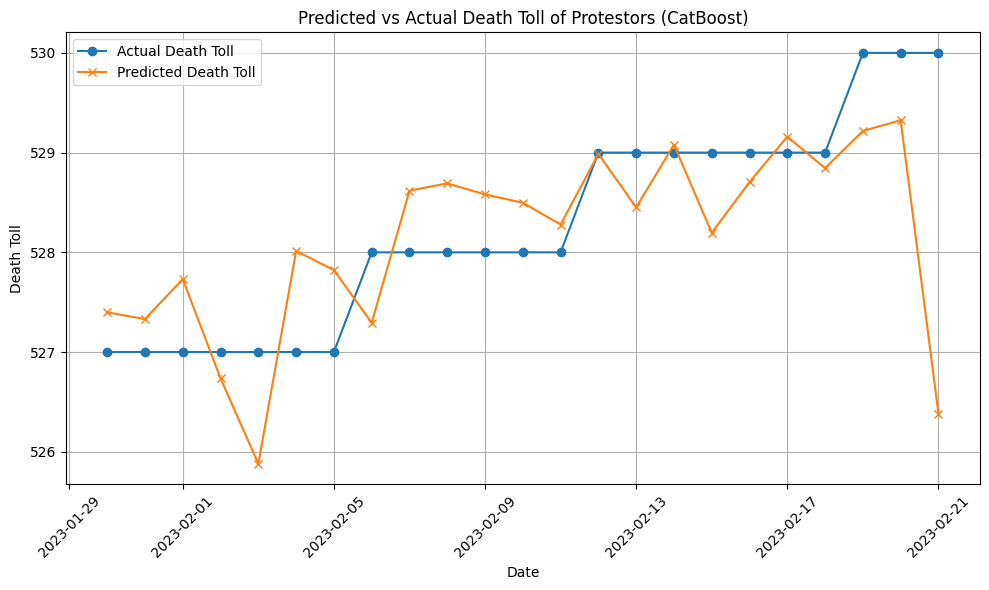


Mean Squared Error: 1.1221408343667796
R^2 Score: 0.9999421050444554


In [71]:
# Imports
from catboost import CatBoostRegressor

# Create a CatBoost model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', CatBoostRegressor(silent=True))
])

# Train the model
model.fit(X_train, y_train)

# Prepare future data for predictions
X_future = future_data[features]
X_future.fillna(0, inplace=True)

# Make predictions for the future dates
future_predictions = model.predict(X_future)

# Output future predictions
future_data['Predicted_Death_Toll'] = future_predictions
print(future_data[['Date', 'Predicted_Death_Toll']])

# Plotting Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.plot(future_data['Date'], future_data['Death Toll of Protestors'], label='Actual Death Toll', marker='o')
plt.plot(future_data['Date'], future_data['Predicted_Death_Toll'], label='Predicted Death Toll', marker='x')
plt.title('Predicted vs Actual Death Toll of Protestors (CatBoost)')
plt.xlabel('Date')
plt.ylabel('Death Toll')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Evaluate the model on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nMean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


          Date  Predicted_Death_Toll
135 2023-01-30            516.357993
136 2023-01-31            516.506736
137 2023-02-01            516.765959
138 2023-02-02            516.919299
139 2023-02-03            516.746456
140 2023-02-04            517.176396
141 2023-02-05            517.199312
142 2023-02-06            517.134285
143 2023-02-07            517.438601
144 2023-02-08            517.730853
145 2023-02-09            518.093593
146 2023-02-10            518.191014
147 2023-02-11            518.206898
148 2023-02-12            518.126553
149 2023-02-13            518.141336
150 2023-02-14            518.371424
151 2023-02-15            518.559804
152 2023-02-16            519.074993
153 2023-02-17            519.883990
154 2023-02-18            519.884725
155 2023-02-19            519.860625
156 2023-02-20            519.870251
157 2023-02-21            519.926268


C:\Users\user name\AppData\Local\Temp\ipykernel_15212\244783793.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_future.fillna(0, inplace=True)


Text(0.5, 1.0, 'Predicted vs Actual Death Toll of Protestors (ElasticNet)')

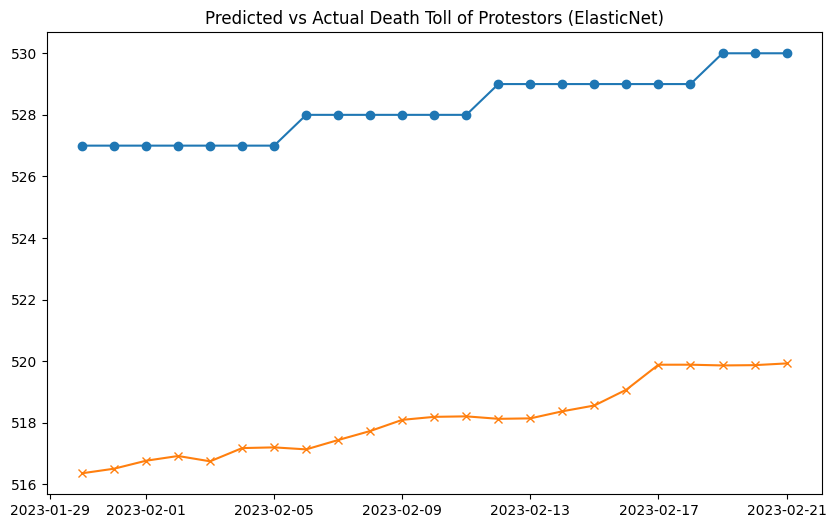

In [72]:
# Imports
from sklearn.linear_model import ElasticNet

# Create an ElasticNet model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet())
])

# Train the model
model.fit(X_train, y_train)

# Prepare future data for predictions
X_future = future_data[features]
X_future.fillna(0, inplace=True)

# Make predictions for the future dates
future_predictions = model.predict(X_future)

# Output future predictions
future_data['Predicted_Death_Toll'] = future_predictions
print(future_data[['Date', 'Predicted_Death_Toll']])

# Plotting Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.plot(future_data['Date'], future_data['Death Toll of Protestors'], label='Actual Death Toll', marker='o')
plt.plot(future_data['Date'], future_data['Predicted_Death_Toll'], label='Predicted Death Toll', marker='x')
plt.title('Predicted vs Actual Death Toll of Protestors (ElasticNet)')

